<a href="https://colab.research.google.com/github/Muhirwakyeyune/GDA_Live_coding_FML23/blob/class/neuralnetwork_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1421]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset

import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch import optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

## load Dataset using pandas

In [1422]:
data = pd.read_csv('/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##Drop the columns id and Unnamed: 32

In [1423]:
data=data.drop( ['id','Unnamed: 32'], axis=1) 
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## separate your input data and target (the target correspond to the column diagnosis)

In [1424]:
X =data.loc[:,data.columns !='diagnosis']

y = data['diagnosis']
X.shape




(569, 30)

In [1425]:
y.shape

(569,)

## Convert your data into numpy arrays

In [1426]:

X =np.array(X)
y = np.array(y)
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## transform you target values into 0 (for M) and 1 (for B)

In [1427]:

# target_m={'M':0,'B':1}
# y=np.vectorize(target_m.get)(y)
y = np.where(y == "B", 1, 0)

In [1428]:
torch.manual_seed(1234)
np.random.seed(1234)

## Split your data into train and test sets (20% for test)

In [1429]:
def split_data(x, y):

  leng = len(x) * 0.8

  # check the shape
  X_train, X_test= x[:int(leng)], x[int(leng):] 
  y_train, y_test =y[:int(leng)], y[int(leng):]
  return X_train, y_train, X_test, y_test

In [1430]:
X_train, y_train, X_test, y_test = split_data(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [1431]:
X_train

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.200e+01, 2.823e+01, 7.677e+01, ..., 7.116e-02, 2.447e-01,
        8.194e-02],
       [1.453e+01, 1.398e+01, 9.386e+01, ..., 1.069e-01, 2.606e-01,
        7.810e-02],
       [1.262e+01, 1.715e+01, 8.062e+01, ..., 9.851e-02, 3.270e-01,
        7.330e-02]])

## Feature scaling

In [1432]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Why is it important to scale this data?

##Implement the BreastCancerDataset class that inherit from pytorch Dataset

In [1433]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class BreastCancerDataset(Dataset):

  def __init__(self,X, y , transform=None):
    
    self.transform=transform
    #self.X=X
    #self.y=y
    self.X= torch.from_numpy(X)
    self.y =torch.from_numpy(y)
  def __len__(self):
    return self.X.shape[0]
  def __getitem__(self, index):
    X = self.X[index]
    y = self.y[index]
    return X, y
  
class ToTensor:
  def __call__(self, sample):
    inputs, target = sample
    return torch.from_numpy(inputs), torch.from_numpy(target)


trainload1=  BreastCancerDataset(X_train,y_train, transform=ToTensor()) 
testload1= BreastCancerDataset(X_test,y_test, transform=ToTensor())


In [1434]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [1435]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training

## create dataloader with batch_size 16
trainloader = torch.utils.data.DataLoader(trainload1, batch_size=16,
                                          shuffle=True)
#alldata=[]
#for b in trainloader:
  #$f , l =b
  #alldata.append((f,l))
  #all_features = torch.cat([data[0] for data in alldata], dim=0)
  #all_labels = torch.cat([data[1] for data in alldata], dim=0)
  #print(alldata)







## Feedforward network

In [1436]:


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device



device(type='cpu')

In [1437]:
from operator import xor
# Fully connected neural network with an input layer, one hidden layer and an output layer
## apply relu between layers
# add Sigmoid  after the output layer
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        ## add your layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.fc1=nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2=nn.Linear(hidden_size, 20)
        self.relu1 = nn.ReLU()

        self.fc3=nn.Linear(20,num_classes)
        self.sigmoid=nn.Sigmoid()


    
    def forward(self, x):
      out=self.fc1(x)
      out = self.relu(out)
      out=self.fc2(out)
      out=self.relu(out)
      out=self.fc3(out)
      out=self.sigmoid(out)
 
        
      return out

In [1438]:
## initialize your model

# Hyper-parameters 
input_size = X_train.shape[1]

num_classes = 1
hidden_size=16

num_epochs = 40
learning_rate = 0.001
model = NeuralNet(input_size, hidden_size, num_classes).to(device)



In [1439]:






X_train.shape[1]

30

## define a criterion and optimizer

In [1440]:


#criterion =nn.CrossEntropyLoss()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)



## Train your model (save the loss in a list and plot it)

In [1441]:
import matplotlib.pyplot as plt
losses = []
for e in range(num_epochs):
  running_loss=0.0
  for i, (f, l) in enumerate(trainloader):
      
      #f = f.to(device)
      # f=f.reshape(-1,1).type(torch.float32)
      f = f.float().to(device)
      l=l.reshape(-1,1).to(device)

        # zero the parameter gradients
    

        
      outputs = model.forward(f)
      # print(f"outputs:{outputs}")
      # print(f"labels:{l}")
      loss = criterion(outputs, l.to(torch.float32))
      loss.backward()
      losses.append(loss.item())

      optimizer.step()
      optimizer.zero_grad()
      running_loss += loss.item()
      ### add your training code her
      if (i+1) % 2 == 0:
       print (f'Epoch [{e+1}/{num_epochs}], Loss: {loss.item():.4f}')

 


Epoch [1/40], Loss: 0.6934
Epoch [1/40], Loss: 0.6761
Epoch [1/40], Loss: 0.6923
Epoch [1/40], Loss: 0.6791
Epoch [1/40], Loss: 0.6704
Epoch [1/40], Loss: 0.6862
Epoch [1/40], Loss: 0.6816
Epoch [1/40], Loss: 0.6813
Epoch [1/40], Loss: 0.6791
Epoch [1/40], Loss: 0.6847
Epoch [1/40], Loss: 0.6691
Epoch [1/40], Loss: 0.6761
Epoch [1/40], Loss: 0.6691
Epoch [1/40], Loss: 0.6757
Epoch [2/40], Loss: 0.6623
Epoch [2/40], Loss: 0.6703
Epoch [2/40], Loss: 0.6789
Epoch [2/40], Loss: 0.6559
Epoch [2/40], Loss: 0.6629
Epoch [2/40], Loss: 0.6650
Epoch [2/40], Loss: 0.6609
Epoch [2/40], Loss: 0.6902
Epoch [2/40], Loss: 0.6639
Epoch [2/40], Loss: 0.6620
Epoch [2/40], Loss: 0.6679
Epoch [2/40], Loss: 0.6688
Epoch [2/40], Loss: 0.6581
Epoch [2/40], Loss: 0.6644
Epoch [3/40], Loss: 0.6567
Epoch [3/40], Loss: 0.6743
Epoch [3/40], Loss: 0.6567
Epoch [3/40], Loss: 0.6753
Epoch [3/40], Loss: 0.6750
Epoch [3/40], Loss: 0.6355
Epoch [3/40], Loss: 0.6453
Epoch [3/40], Loss: 0.6396
Epoch [3/40], Loss: 0.6353
E

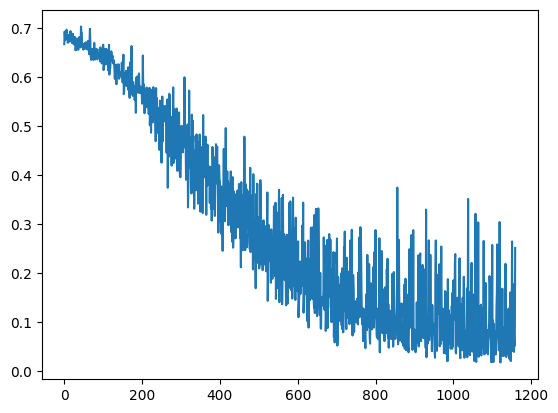

In [1442]:
plt.plot(losses)

## Test the model

In [1443]:
testloader = torch.utils.data.DataLoader(testload1, batch_size=16,
                                          shuffle=True)
#alldata=[]
# Remember that in test phase, we don't need to compute gradients 
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for step, (X_test, y_test) in enumerate(testloader):
        print("Step: ", step)
        X_test = X_test.float().to(device)
        y_test = y_test.to(device)
        outputs = model(X_test)
        pred=torch.where(outputs>=0.5,1,0).flatten()
        n_samples +=X_test.shape[0]
        n_correct += (pred == y_test).sum().item()

    acc = 100.0 * (n_correct / n_samples)
    
   
#compute also the accuracy on your test set

Step:  0
Step:  1
Step:  2
Step:  3
Step:  4
Step:  5
Step:  6
Step:  7


In [1444]:
print(acc)

98.24561403508771


In [1445]:
n_correct

112

## Saving your model

In [1446]:
## save your model
torch.save(model.state_dict, 'model_weights.pth')

## change your activation functions, reimplement your model class with the new activation functions and train the model with the best hyper parameters that you found so far.

Plot the loss during training

In [1447]:
from operator import xor
# Fully connected neural network with an input layer, one hidden layer and an output layer
## apply relu between layers
# add Sigmoid  after the output layer
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        ## add your layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.fc1=nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.fc2=nn.Linear(hidden_size, 20)
        self.relu1 = nn.Tanh()

        self.fc3=nn.Linear(20,num_classes)
        self.Softmax=nn.Softmax()


    
    def forward(self, x):
      out=self.fc1(x)
      out = self.tanh(out)
      out=self.fc2(out)
      out=self.tanh(out)
      out=self.fc3(out)
      out=self.Softmax(out)
 
        
      return out

In [1448]:
## initialize your model

# Hyper-parameters 
input_size = X_train.shape[1]

num_classes = 1
hidden_size=16

num_epochs = 40
learning_rate = 0.001
model = NeuralNet(input_size, hidden_size, num_classes).to(device)



In [1449]:


#criterion =nn.CrossEntropyLoss()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.8)

In [1450]:
import matplotlib.pyplot as plt
losses = []
for e in range(num_epochs):
  running_loss=0.0
  for i, (f, l) in enumerate(trainloader):
      
      #f = f.to(device)
      # f=f.reshape(-1,1).type(torch.float32)
      f = f.float().to(device)
      l=l.reshape(-1,1).to(device)

        # zero the parameter gradients
    

        
      outputs = model.forward(f)
      # print(f"outputs:{outputs}")
      # print(f"labels:{l}")
      loss = criterion(outputs, l.to(torch.float32))
      loss.backward()
      losses.append(loss.item())

      optimizer.step()
      optimizer.zero_grad()
      running_loss += loss.item()
      ### add your training code her
      if (i+1) % 2 == 0:
       print (f'Epoch [{e+1}/{num_epochs}], Loss: {loss.item():.4f}')

 


Epoch [1/40], Loss: 37.5000
Epoch [1/40], Loss: 18.7500
Epoch [1/40], Loss: 62.5000
Epoch [1/40], Loss: 31.2500
Epoch [1/40], Loss: 43.7500
Epoch [1/40], Loss: 43.7500
Epoch [1/40], Loss: 56.2500
Epoch [1/40], Loss: 50.0000
Epoch [1/40], Loss: 43.7500
Epoch [1/40], Loss: 18.7500
Epoch [1/40], Loss: 56.2500
Epoch [1/40], Loss: 43.7500
Epoch [1/40], Loss: 25.0000
Epoch [1/40], Loss: 37.5000
Epoch [2/40], Loss: 68.7500
Epoch [2/40], Loss: 37.5000
Epoch [2/40], Loss: 43.7500
Epoch [2/40], Loss: 62.5000
Epoch [2/40], Loss: 25.0000
Epoch [2/40], Loss: 25.0000
Epoch [2/40], Loss: 43.7500
Epoch [2/40], Loss: 50.0000
Epoch [2/40], Loss: 25.0000
Epoch [2/40], Loss: 31.2500
Epoch [2/40], Loss: 31.2500
Epoch [2/40], Loss: 37.5000
Epoch [2/40], Loss: 50.0000
Epoch [2/40], Loss: 25.0000
Epoch [3/40], Loss: 62.5000
Epoch [3/40], Loss: 31.2500
Epoch [3/40], Loss: 62.5000
Epoch [3/40], Loss: 43.7500
Epoch [3/40], Loss: 56.2500
Epoch [3/40], Loss: 37.5000
Epoch [3/40], Loss: 56.2500
Epoch [3/40], Loss: 

<ipython-input-1447-2b4901a595cf>:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out=self.Softmax(out)


Epoch [3/40], Loss: 62.5000
Epoch [4/40], Loss: 50.0000
Epoch [4/40], Loss: 43.7500
Epoch [4/40], Loss: 43.7500
Epoch [4/40], Loss: 43.7500
Epoch [4/40], Loss: 56.2500
Epoch [4/40], Loss: 50.0000
Epoch [4/40], Loss: 50.0000
Epoch [4/40], Loss: 37.5000
Epoch [4/40], Loss: 50.0000
Epoch [4/40], Loss: 31.2500
Epoch [4/40], Loss: 18.7500
Epoch [4/40], Loss: 12.5000
Epoch [4/40], Loss: 37.5000
Epoch [4/40], Loss: 68.7500
Epoch [5/40], Loss: 43.7500
Epoch [5/40], Loss: 37.5000
Epoch [5/40], Loss: 62.5000
Epoch [5/40], Loss: 37.5000
Epoch [5/40], Loss: 31.2500
Epoch [5/40], Loss: 37.5000
Epoch [5/40], Loss: 25.0000
Epoch [5/40], Loss: 56.2500
Epoch [5/40], Loss: 50.0000
Epoch [5/40], Loss: 37.5000
Epoch [5/40], Loss: 31.2500
Epoch [5/40], Loss: 43.7500
Epoch [5/40], Loss: 37.5000
Epoch [5/40], Loss: 25.0000
Epoch [6/40], Loss: 37.5000
Epoch [6/40], Loss: 37.5000
Epoch [6/40], Loss: 43.7500
Epoch [6/40], Loss: 31.2500
Epoch [6/40], Loss: 25.0000
Epoch [6/40], Loss: 37.5000
Epoch [6/40], Loss: 

In [1451]:
testloader = torch.utils.data.DataLoader(testload1, batch_size=16,
                                          shuffle=True)
#alldata=[]
# Remember that in test phase, we don't need to compute gradients 
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for step, (X_test, y_test) in enumerate(testloader):
        print("Step: ", step)
        X_test = X_test.float().to(device)
        y_test = y_test.to(device)
        outputs = model(X_test)
        pred=torch.where(outputs>=0.5,1,0).flatten()
        n_samples +=X_test.shape[0]
        n_correct += (pred == y_test).sum().item()

    acc = 100.0 * (n_correct / n_samples)
    
   
#compute also the accuracy on your test set

Step:  0
Step:  1
Step:  2
Step:  3
Step:  4
Step:  5
Step:  6
Step:  7


<ipython-input-1447-2b4901a595cf>:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out=self.Softmax(out)


In [1452]:
print(acc)

77.19298245614034


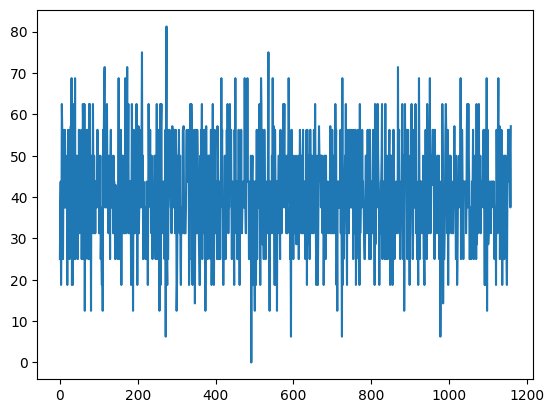

In [1453]:
import matplotlib.pyplot as plt
plt.plot(losses)

conclusion: by looking by accuracies, we can decide that ReLu is best activator for implementing neural networks

Conlusion